A análise estatística aplicada à mineração de dados inicia pela compreensão dos conceitos de população e amostra. A população corresponde ao conjunto total de elementos ou indivíduos que possuem pelo menos uma característica em comum e que são objeto de estudo. Já a amostra é um subconjunto extraído da população, selecionado com o objetivo de representar suas principais características de forma prática e viável.<br> <br>

A escolha adequada de uma amostra é essencial para reduzir custos, tempo e esforço, além de permitir a generalização dos resultados obtidos. A escolha da amostra influencia diretamente a qualidade das conclusões estatísticas. Entre as técnicas mais utilizadas destacam-se:<br> <br>
* **Amostragem aleatória simples**: cada elemento da população tem a mesma probabilidade de ser escolhido.
* **Amostragem estratificada**: a população é dividida em estratos (por exemplo, curso ou semestre) e a seleção ocorre proporcionalmente em cada estrato.
Amostragem sistemática: seleciona-se cada k-ésimo elemento de uma lista ordenada.
* **Amostragem por conglomerados**: selecionam-se grupos inteiros (turmas, cidades, regiões), em vez de indivíduos isolados.<br> <br>

Na prática da mineração de dados, essas técnicas ajudam a reduzir vieses e garantem que a amostra represente adequadamente a população, permitindo generalizações mais confiáveis.
Outro conceito fundamental está relacionado aos tipos de variáveis, que determinam quais técnicas estatísticas podem ser aplicadas:  <br> <br>


* **Qualitativas nominais**: categorias sem ordenação natural, como curso ou cidade.
* **Qualitativas ordinais**: categorias com ordenação, como semestre ou nível de satisfação.
* **Quantitativas discretas**: valores numéricos contáveis, como número de disciplinas cursadas.
* **Quantitativas contínuas**: valores em escala contínua, como nota de prova ou horas de estudo.
* **Quantitativas contínuas**: valores em escala contínua, como nota de prova ou horas de estudo.<br> <br>

A correta identificação do tipo de variável é indispensável para escolher medidas de tendência central, de dispersão e testes estatísticos adequados.

In [12]:
import pandas as pd
import numpy as np

# Fixando semente p/ reprodutibilidade
np.random.seed(42)

# Criando um DataFrame com diferentes tipos de variáveis
n = 20  # tamanho pequeno só p/ visualizar

df = pd.DataFrame({
    # Variável qualitativa nominal (sem ordem)
    "curso": np.random.choice(["Engenharia", "ADS", "SI"], size=n),

    # Variável qualitativa ordinal (ordem natural)
    "semestre": np.random.choice([1, 2, 3, 4, 5, 6, 7, 8], size=n),

    # Variável quantitativa discreta (valores contáveis)
    "disciplinas_cursadas": np.random.randint(1, 10, size=n),

    # Variável quantitativa contínua (escala contínua)
    "nota_prova": np.round(np.random.normal(loc=7, scale=1.5, size=n), 2),
})

# Criando um dicionário de mapeamento dos tipos de variáveis
tipos_variaveis = {
    "curso": "Qualitativa nominal",
    "semestre": "Qualitativa ordinal",
    "disciplinas_cursadas": "Quantitativa discreta",
    "nota_prova": "Quantitativa contínua"
}

print("=== Dataset de Exemplo ===")
print(df.head(), "\n")

print("=== Tipos de Variáveis ===")
for var, tipo in tipos_variaveis.items():
    print(f"{var}: {tipo}")

=== Dataset de Exemplo ===
        curso  semestre  disciplinas_cursadas  nota_prova
0          SI         8                     3        8.70
1  Engenharia         4                     7        7.56
2          SI         5                     4        6.42
3          SI         1                     9        5.26
4  Engenharia         4                     3        7.85 

=== Tipos de Variáveis ===
curso: Qualitativa nominal
semestre: Qualitativa ordinal
disciplinas_cursadas: Quantitativa discreta
nota_prova: Quantitativa contínua


### Explicação do código linha a linha

1. **`import pandas as pd` e `import numpy as np`**  
   Importação das bibliotecas. `pandas` é usada para manipulação de tabelas de dados (DataFrames), enquanto `numpy` é utilizada para cálculos matemáticos e geração de números aleatórios.  

2. **`np.random.seed(42)`**  
   Define uma semente para geração aleatória. Isso garante que os resultados sejam sempre os mesmos, permitindo reprodutibilidade.  

3. **`n = 20`**  
   Define a quantidade de linhas do conjunto de dados. Neste exemplo, estamos criando uma tabela com 20 registros.  

4. **`df = pd.DataFrame({...})`**  
   Criação do DataFrame. Um DataFrame é como uma tabela, com linhas e colunas.  
   - **`curso`**: variável qualitativa nominal, escolhida aleatoriamente entre Engenharia, ADS e SI.  
   - **`semestre`**: variável qualitativa ordinal, pois existe uma ordem natural (1º até 8º).  
   - **`disciplinas_cursadas`**: variável quantitativa discreta, representada por números inteiros de 1 a 9.  
   - **`nota_prova`**: variável quantitativa contínua, simulada a partir de uma distribuição normal com média 7 e desvio padrão 1.5.  

5. **`tipos_variaveis = {...}`**  
   Criação de um dicionário que associa cada coluna ao seu tipo de variável.  

6. **`print(df.head())`**  
   Exibe as primeiras cinco linhas do DataFrame para inspecionar rapidamente como ficou a tabela criada.  

7. **Laço `for var, tipo in tipos_variaveis.items():`**  
   Percorre cada item do dicionário `tipos_variaveis` e imprime o nome da variável com sua respectiva classificação.  

In [13]:
RANDOM_STATE = 123

# =========================================================
# 1) AMOSTRAGEM ALEATÓRIA SIMPLES
# =========================================================
def simple_random_sample(df, n=None, frac=None, replace=False, random_state=RANDOM_STATE):
    if (n is None) == (frac is None):
        raise ValueError("Informe n OU frac (não ambos).")
    return df.sample(n=n, frac=frac, replace=replace, random_state=random_state)

aas_n5 = simple_random_sample(df, n=5, replace=False)
aas_30pct = simple_random_sample(df, frac=0.30, replace=False)

print("\nAAS n=5:", aas_n5.shape)
display(aas_n5)
print("AAS 30%:", aas_30pct.shape)
display(aas_30pct)

# =========================================================
# 2) AMOSTRAGEM ESTRATIFICADA (proporcional)
#    Estratos: curso ou semestre (variáveis existentes no dataset original)
# =========================================================
def stratified_sample(df, by, n=None, frac=None, random_state=RANDOM_STATE):
    if (n is None) == (frac is None):
        raise ValueError("Informe n OU frac (não ambos).")

    if frac is not None:
        # mesma fração para todos os estratos
        out = (df.groupby(by, group_keys=False)
                 .apply(lambda g: g.sample(frac=frac, random_state=random_state)))
        return out.reset_index(drop=True)

    # n total desejado com alocação proporcional
    counts = df[by].value_counts().sort_index()
    N = len(df)
    alloc = (counts / N * n).round().astype(int)

    # ajustar arredondamento para somar exatamente n
    diff = n - alloc.sum()
    if diff != 0:
        order = counts.sort_values(ascending=False).index
        for key in order:
            if diff == 0:
                break
            if diff > 0:
                alloc.loc[key] += 1
                diff -= 1
            else:
                # só retira onde ainda há pelo menos 1
                if alloc.loc[key] > 0:
                    alloc.loc[key] -= 1
                    diff += 1

    parts = []
    for level, k in alloc.items():
        if k <= 0:
            continue
        g = df[df[by] == level].sample(n=min(k, len(df[df[by]==level])),
                                       random_state=random_state)
        parts.append(g)
    out = pd.concat(parts, axis=0).sample(frac=1, random_state=random_state).reset_index(drop=True)
    return out

estrat_curso_n6 = stratified_sample(df, by="curso", n=6, random_state=RANDOM_STATE)
estrat_semestre_25pct = stratified_sample(df, by="semestre", frac=0.25, random_state=RANDOM_STATE)

print("\nEstratificada por CURSO (n=6) — contagens:")
print(estrat_curso_n6["curso"].value_counts().to_dict())
display(estrat_curso_n6)

print("Estratificada por SEMESTRE (25%) — contagens:")
print(estrat_semestre_25pct["semestre"].value_counts().sort_index().to_dict())
display(estrat_semestre_25pct.sort_values("semestre"))

# =========================================================
# 3) AMOSTRAGEM SISTEMÁTICA
#    Usa a ordem atual do df (index) ou pode ordenar por uma coluna existente.
# =========================================================
def systematic_sample(df, n, sort_by=None, random_state=RANDOM_STATE):
    rng = np.random.default_rng(random_state)
    data = df.copy()
    if sort_by is not None:
        data = data.sort_values(by=sort_by).reset_index(drop=True)
    N = len(data)
    if n > N:
        raise ValueError("n não pode ser maior que o tamanho do DataFrame.")
    k = N // n
    k = max(k, 1)
    start = rng.integers(0, k)  # início aleatório entre 0 e k-1
    idxs = list(range(start, N, k))[:n]
    return data.iloc[idxs].reset_index(drop=True)

sist_n5 = systematic_sample(df, n=5, sort_by=None, random_state=RANDOM_STATE)
print("\nSistemática n=5:", sist_n5.shape)
display(sist_n5)

# =========================================================
# 4) AMOSTRAGEM POR CONGLOMERADOS (clusters)
#    Cluster = 'curso' (coluna existente).
#    Um estágio: escolhe clusters e leva TODOS os elementos do cluster escolhido.
#    Dois estágios: escolhe clusters e amostra dentro de cada um.
# =========================================================
def cluster_sample_one_stage(df, cluster_col, m_clusters, random_state=RANDOM_STATE):
    rng = np.random.default_rng(random_state)
    clusters = df[cluster_col].drop_duplicates().to_list()
    if m_clusters > len(clusters):
        raise ValueError("m_clusters maior que o número de clusters.")
    chosen = rng.choice(clusters, size=m_clusters, replace=False)
    return df[df[cluster_col].isin(chosen)].reset_index(drop=True)

def cluster_sample_two_stage(df, cluster_col, m_clusters, n_within=None, frac_within=None, random_state=RANDOM_STATE):
    if (n_within is None) == (frac_within is None):
        raise ValueError("Informe n_within OU frac_within (não ambos).")
    rng = np.random.default_rng(random_state)
    clusters = df[cluster_col].drop_duplicates().to_list()
    if m_clusters > len(clusters):
        raise ValueError("m_clusters maior que o número de clusters.")
    chosen = rng.choice(clusters, size=m_clusters, replace=False)

    parts = []
    for c in chosen:
        g = df[df[cluster_col] == c]
        if n_within is not None:
            k = min(n_within, len(g))
            parts.append(g.sample(n=k, random_state=int(rng.integers(0, 1_000_000))))
        else:
            parts.append(g.sample(frac=frac_within, random_state=int(rng.integers(0, 1_000_000))))
    return pd.concat(parts, axis=0).reset_index(drop=True)

cluster_1stage = cluster_sample_one_stage(df, cluster_col="curso", m_clusters=2, random_state=RANDOM_STATE)
print("\nCluster (1 estágio, 2 cursos) — contagens por curso:")
print(cluster_1stage["curso"].value_counts().to_dict())
display(cluster_1stage)

cluster_2stage = cluster_sample_two_stage(df, cluster_col="curso", m_clusters=2, n_within=3, random_state=RANDOM_STATE)
print("Cluster (2 estágios, 2 cursos, 3 por curso) — contagens por curso:")
print(cluster_2stage["curso"].value_counts().to_dict())
display(cluster_2stage)


AAS n=5: (5, 4)


,curso,semestre,disciplinas_cursadas,nota_prova
14,ADS,2,2,5.64
5,Engenharia,2,5,5.94
4,Engenharia,4,3,7.85
17,ADS,4,2,10.98
8,SI,4,5,6.31


AAS 30%: (6, 4)


,curso,semestre,disciplinas_cursadas,nota_prova
14,ADS,2,2,5.64
5,Engenharia,2,5,5.94
4,Engenharia,4,3,7.85
17,ADS,4,2,10.98
8,SI,4,5,6.31
7,ADS,5,7,6.47



Estratificada por CURSO (n=6) — contagens:
{'ADS': 2, 'Engenharia': 2, 'SI': 2}


/tmp/ipython-input-860268586.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(frac=frac, random_state=random_state)))


,curso,semestre,disciplinas_cursadas,nota_prova
0,ADS,4,2,10.98
1,Engenharia,3,4,8.05
2,SI,3,2,8.80
3,ADS,2,2,5.64
4,Engenharia,4,3,7.85
5,SI,8,3,8.70


Estratificada por SEMESTRE (25%) — contagens:
{1: 1, 4: 1, 8: 1}


,curso,semestre,disciplinas_cursadas,nota_prova
0,SI,1,9,5.26
1,Engenharia,4,3,7.85
2,SI,8,3,8.70



Sistemática n=5: (5, 4)


,curso,semestre,disciplinas_cursadas,nota_prova
0,SI,8,3,8.70
1,Engenharia,4,3,7.85
2,SI,4,5,6.31
3,Engenharia,3,4,8.05
4,ADS,4,5,8.18



Cluster (1 estágio, 2 cursos) — contagens por curso:
{'SI': 9, 'ADS': 6}


,curso,semestre,disciplinas_cursadas,nota_prova
0,SI,8,3,8.70
1,SI,5,4,6.42
2,SI,1,9,5.26
3,SI,6,3,4.93
4,ADS,5,7,6.47
5,SI,4,5,6.31
6,SI,1,9,7.10
7,SI,1,7,6.74
8,SI,3,2,8.80
9,SI,7,9,6.74


Cluster (2 estágios, 2 cursos, 3 por curso) — contagens por curso:
{'SI': 3, 'ADS': 3}


,curso,semestre,disciplinas_cursadas,nota_prova
0,SI,5,4,6.42
1,SI,4,5,6.31
2,SI,1,9,7.10
3,ADS,2,2,5.64
4,ADS,8,4,7.40
5,ADS,4,2,10.98


### Guia rápido das técnicas de amostragem

Este bloco explica, de forma prática, as quatro técnicas implementadas acima e como o código realiza cada uma.

---

#### 1. Amostragem aleatória simples

**O que é**  
Cada unidade da população tem a mesma probabilidade de ser selecionada. Pode ser com ou sem reposição.

**Quando usar**  
• População relativamente homogênea  
• Não há necessidade de garantir representatividade por subgrupos

**Como o código faz**  
• `df.sample(n=..., replace=..., random_state=...)` seleciona n linhas ao acaso  
• Alternativa proporcional: `df.sample(frac=0.2, ...)` seleciona 20 por cento da base

**Prós**  
• Fácil de aplicar e entender  
• Boa base para estimativas não estratificadas

**Limitações**  
• Pode gerar amostras desequilibradas em subgrupos importantes  
• Menor controle sobre cobertura de categorias raras

---

#### 2. Amostragem estratificada

**O que é**  
Divide a população em estratos mutuamente exclusivos e exaustivos e realiza amostragem dentro de cada estrato. Neste notebook, a alocação é proporcional ao tamanho do estrato.

**Quando usar**  
• Necessidade de preservar a proporção de subgrupos  
• Comparações entre categorias como curso ou semestre

**Como o código faz**  
• Função `stratified_sample(df, by="curso", n=...)`  
• Calcula tamanhos por estrato, distribui n proporcionalmente e amostra em cada grupo  
• Versão por fração: `stratified_sample(df, by="curso", frac=0.10)`

**Prós**  
• Garante representatividade por subgrupo  
• Reduz variância de estimativas quando os estratos são internamente homogêneos

**Limitações**  
• Requer conhecer a variável de estratificação  
• Cálculo de alocação e arredondamentos precisam de cuidado

---

#### 3. Amostragem sistemática

**O que é**  
Ordena a população e seleciona cada k-ésimo elemento, após um início aleatório.

**Quando usar**  
• Listas grandes e já ordenadas  
• Coleta rápida com cobertura razoavelmente uniforme

**Como o código faz**  
• Função `systematic_sample(df, n=..., sort_by="id_estudante")`  
• Define k como quociente inteiro N dividido por n  
• Sorteia o ponto inicial entre 0 e k menos 1 e coleta índices espaçados por k

**Prós**  
• Implementação simples e eficiente  
• Distribuição das seleções ao longo da lista

**Limitações**  
• Sensível a padrões periódicos na ordenação  
• Se a ordem tiver estrutura, pode introduzir viés

---

#### 4. Amostragem por conglomerados

**O que é**  
Seleciona grupos inteiros como unidades primárias de amostragem. Um estágio inclui todos os elementos dos conglomerados escolhidos. Dois estágios amostram dentro de cada conglomerado selecionado.

**Quando usar**  
• População naturalmente agrupada por turmas, cidades ou cursos  
• Custos operacionais altos para amostrar indivíduos isolados

**Como o código faz**  
• Um estágio: `cluster_sample_one_stage(df, cluster_col="curso", m_clusters=2)` seleciona 2 cursos e inclui todos os alunos desses cursos  
• Dois estágios: `cluster_sample_two_stage(..., m_clusters=2, n_within=8)` seleciona 2 cursos e, dentro de cada um, amostra 8 alunos

**Prós**  
• Logística simplificada  
• Útil quando não existe lista completa de indivíduos, mas há lista de grupos

**Limitações**  
• Maior variância se os conglomerados forem internamente heterogêneos  
• Tamanho efetivo da amostra pode ser menor que o aparente por correlação intraclasse

---

### Boas práticas gerais

**Reprodutibilidade**  
• Use `random_state` ou `np.random.seed` para obter resultados comparáveis

**Tamanhos desejados**  
• Verifique `len(amostra)` e compare com o planejado  
• Na estratificada com n fixo, ajuste arredondamentos para somar exatamente n

**Cobertura e viés**  
• Examine distribuição de variáveis chave na amostra e na população  
• Em estratificada, compare `value_counts(normalize=True)` por estrato

**Checklist de escolha rápida**  
• Garantir proporções de subgrupos essenciais: estratificada  
• Ganhar velocidade em listas ordenadas sem padrões: sistemática  
• Logística por grupos e custos: conglomerados  
• Caso simples sem requisitos de subgrupos: aleatória simples

---

## Visualização e organização de dados

### Conceitos rápidos

**Histograma**  
• Gráfico de frequências para variáveis quantitativas, agrupando valores em intervalos contíguos (bins)  
• Finalidades: observar forma da distribuição, assimetrias, caudas, valores atípicos, concentração e dispersão

**Tabulação cruzada**  
• Tabela que cruza duas variáveis categóricas e contabiliza frequências conjuntas  
• Finalidades: investigar associação entre categorias, comparar proporções condicionais, identificar desequilíbrios de amostragem

**Interpretação gráfica**  
• Forma da distribuição: simétrica, assimétrica à esquerda ou à direita  
• Posição: média e mediana como referências  
• Dispersão: largura do histograma e variabilidade entre categorias na crosstab  
• Proporções: comparar linhas ou colunas normalizadas para separar efeitos de tamanho amostral


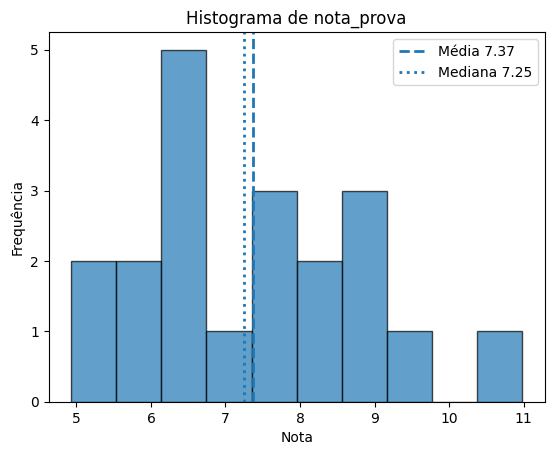

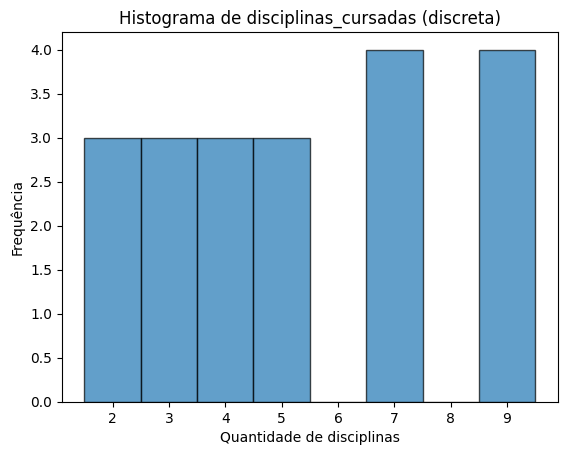

semestre,1,2,3,4,5,6,7,8
curso,,,,,,,,
ADS,0,1,0,2,1,0,1,1
Engenharia,0,1,1,2,0,0,0,1
SI,3,0,1,1,1,1,1,1


semestre,1,2,3,4,5,6,7,8
curso,,,,,,,,
ADS,0.000,0.167,0.000,0.333,0.167,0.000,0.167,0.167
Engenharia,0.000,0.200,0.200,0.400,0.000,0.000,0.000,0.200
SI,0.333,0.000,0.111,0.111,0.111,0.111,0.111,0.111


nota_prova,≤5.0,"(5.0,7.0]","(7.0,9.0]",>9.0
curso,,,,
ADS,0,2,2,2
Engenharia,0,1,4,0
SI,1,5,3,0


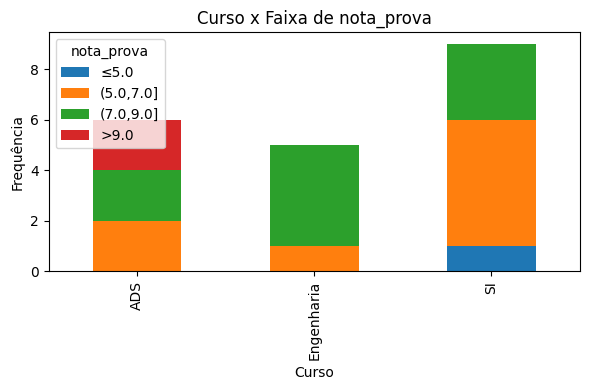

In [ ]:
# ATENÇÃO: este código assume que o DataFrame 'df' já existe da Parte 1.
# Bibliotecas gráficas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# -----------------------------
# 1) Histograma de 'nota_prova'
# -----------------------------
serie = df["nota_prova"].dropna()

fig, ax = plt.subplots()
ax.hist(serie, bins=10, edgecolor="black", alpha=0.7)
media = serie.mean()
mediana = serie.median()
ax.axvline(media, linestyle="--", linewidth=2, label=f"Média {media:.2f}")
ax.axvline(mediana, linestyle=":", linewidth=2, label=f"Mediana {mediana:.2f}")
ax.set_title("Histograma de nota_prova")
ax.set_xlabel("Nota")
ax.set_ylabel("Frequência")
ax.legend()
plt.show()

# --------------------------------------------------------
# 2) Histograma de 'disciplinas_cursadas' (variável discreta)
#    Bins centrados em inteiros para melhor leitura
# --------------------------------------------------------
vals = df["disciplinas_cursadas"].dropna()
lim_inf = vals.min() - 0.5
lim_sup = vals.max() + 0.5
bins = np.arange(lim_inf, lim_sup + 1, 1)

fig, ax = plt.subplots()
ax.hist(vals, bins=bins, edgecolor="black", alpha=0.7)
ax.set_title("Histograma de disciplinas_cursadas (discreta)")
ax.set_xlabel("Quantidade de disciplinas")
ax.set_ylabel("Frequência")
ax.set_xticks(range(int(vals.min()), int(vals.max()) + 1))
plt.show()

# -----------------------------------------
# 3) Tabulação cruzada: curso x semestre
# -----------------------------------------
tab_cs = pd.crosstab(df["curso"], df["semestre"])
display(tab_cs)

# Versão normalizada por linha (proporções dentro de cada curso)
tab_cs_prop = pd.crosstab(df["curso"], df["semestre"], normalize="index").round(3)
display(tab_cs_prop)

# ----------------------------------------------------------------
# 4) Tabulação cruzada com discretização de 'nota_prova' em faixas
# ----------------------------------------------------------------
faixas = pd.cut(
    df["nota_prova"],
    bins=[-np.inf, 5, 7, 9, np.inf],
    labels=["≤5.0", "(5.0,7.0]", "(7.0,9.0]", ">9.0"]
)
tab_curso_faixa = pd.crosstab(df["curso"], faixas)
display(tab_curso_faixa)

# Versão empilhada em barras para visual rápido
ax = tab_curso_faixa.plot(kind="bar", stacked=True, figsize=(6,4))
ax.set_title("Curso x Faixa de nota_prova")
ax.set_xlabel("Curso")
ax.set_ylabel("Frequência")
plt.tight_layout()
plt.show()

### Explicação do código linha a linha

1. `import matplotlib.pyplot as plt`, `import numpy as np`, `import pandas as pd`  
   Carrega bibliotecas para gráficos, cálculo numérico e manipulação de dados.

2. `serie = df["nota_prova"].dropna()`  
   Seleciona a coluna quantitativa e remove ausentes para evitar erros no histograma.

3. `fig, ax = plt.subplots()`  
   Cria a figura e o eixo para desenhar o gráfico.

4. `ax.hist(serie, bins=10, edgecolor="black", alpha=0.7)`  
   Constrói o histograma com dez intervalos. A borda das barras ajuda a leitura.

5. `media = serie.mean()` e `mediana = serie.median()`  
   Calcula medidas de centro para referência visual.

6. `ax.axvline(media, ...)` e `ax.axvline(mediana, ...)`  
   Insere linhas verticais na média e na mediana para comparar posição e assimetria.

7. `set_title`, `set_xlabel`, `set_ylabel`, `legend`  
   Adiciona título, rótulos de eixos e legenda para documentar o gráfico.

8. Histograma para variável discreta  
   `vals = df["disciplinas_cursadas"].dropna()` seleciona a série  
   `bins = np.arange(lim_inf, lim_sup + 1, 1)` define intervalos centrados em inteiros  
   `ax.set_xticks(...)` fixa rótulos nos valores inteiros para melhor leitura

9. `pd.crosstab(df["curso"], df["semestre"])`  
   Gera tabela de contingência de contagens entre duas variáveis categóricas.

10. `normalize="index"` na crosstab  
    Converte cada linha em proporções. Útil para comparar distribuição por semestre dentro de cada curso.

11. Discretização de `nota_prova` com `pd.cut`  
    Cria categorias ordinais de notas a partir de limites definidos e permite cruzar curso e faixa.

12. `tab_curso_faixa.plot(kind="bar", stacked=True)`  
    Produz gráfico de barras empilhadas para visualizar composição por faixa de nota em cada curso.

## Medidas de tendência central

Média aritmética  
• Soma dos valores dividida pelo número de observações  
• Sensível a valores extremos (outliers)  

Mediana  
• Valor central de um conjunto ordenado  
• Divide a amostra em duas partes com igual número de observações  
• Menos sensível a outliers  

Moda  
• Valor ou categoria mais frequente  
• Pode haver mais de uma moda (distribuição multimodal)  

Aplicações práticas  
• Média: útil para dados simétricos e contínuos  
• Mediana: preferida em dados assimétricos ou com outliers  
• Moda: relevante para dados categóricos e para identificar valores mais comuns


=== Medidas de tendência central ===
Média:   7.37
Mediana: 7.25
Moda:    6.74


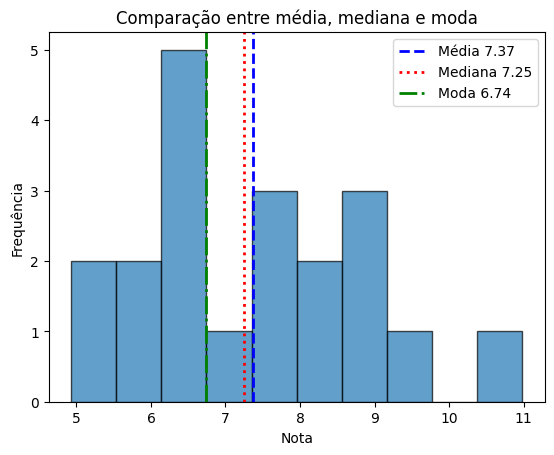

In [ ]:
import numpy as np
import pandas as pd
from statistics import mode, multimode

# Série usada: nota_prova
notas = df["nota_prova"].dropna()

# 1) Média
media = notas.mean()

# 2) Mediana
mediana = notas.median()

# 3) Moda
try:
    moda = mode(notas)  # retorna uma moda
except:
    moda = multimode(notas)  # se houver empate, retorna todas

print("=== Medidas de tendência central ===")
print(f"Média:   {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda:    {moda}")

# Comparação visual: histograma com linhas de média, mediana e moda
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(notas, bins=10, edgecolor="black", alpha=0.7)

ax.axvline(media, color="blue", linestyle="--", linewidth=2, label=f"Média {media:.2f}")
ax.axvline(mediana, color="red", linestyle=":", linewidth=2, label=f"Mediana {mediana:.2f}")

# Moda pode ser uma lista
if isinstance(moda, list):
    for m in moda:
        ax.axvline(m, color="green", linestyle="-.", linewidth=2, label=f"Moda {m}")
else:
    ax.axvline(moda, color="green", linestyle="-.", linewidth=2, label=f"Moda {moda}")

ax.set_title("Comparação entre média, mediana e moda")
ax.set_xlabel("Nota")
ax.set_ylabel("Frequência")
ax.legend()
plt.show()


### Explicação do código linha a linha

1. `from statistics import mode, multimode`  
   Importa funções para calcular moda. `mode` retorna um único valor, enquanto `multimode` retorna lista quando há empate.

2. `notas = df["nota_prova"].dropna()`  
   Seleciona a variável quantitativa contínua, removendo valores ausentes.

3. `media = notas.mean()`  
   Calcula a média aritmética.

4. `mediana = notas.median()`  
   Calcula a mediana da série.

5. `moda = mode(notas)` com tratamento de exceção  
   Retorna a moda. Se houver mais de uma, o bloco `except` usa `multimode` para capturar todas.

6. Impressão formatada com duas casas decimais  
   Apresenta os valores de média, mediana e moda no console.

7. `ax.hist(notas, bins=10, ...)`  
   Constrói histograma para visualizar a distribuição da variável.

8. `ax.axvline(media, ...)`, `ax.axvline(mediana, ...)`, `ax.axvline(moda, ...)`  
   Adiciona linhas verticais indicando as medidas. Cada linha tem cor e estilo diferentes.

9. Estrutura condicional para a moda  
   Se houver múltiplas modas, plota uma linha para cada valor.

10. Títulos, rótulos de eixos e legenda  
    Documentam o gráfico e identificam cada medida.

### Observações

• Quando média, mediana e moda são próximas, a distribuição tende a ser simétrica  
• Quando média > mediana, distribuição pode estar assimétrica à direita (cauda longa para valores maiores)  
• Quando média < mediana, distribuição pode estar assimétrica à esquerda  
• Moda é útil para identificar valor mais comum, mas pode ser instável em dados contínuos


## Medidas de dispersão

### Conceitos

Amplitude  
• Diferença entre o maior e o menor valor observado  
• Simples de calcular, mas depende apenas de dois pontos e é sensível a outliers  

Variância  
• Média dos quadrados dos desvios em relação à média  
• Mede a variabilidade global dos dados  
• Sua unidade é o quadrado da unidade original  

Desvio padrão  
• Raiz quadrada da variância  
• Retorna a variabilidade na mesma unidade dos dados originais  
• Mais interpretável que a variância  

Coeficiente de variação (CV)  
• Razão entre desvio padrão e média, geralmente em porcentagem  
• Permite comparar variabilidade entre variáveis em escalas diferentes  
• CV baixo: pouca dispersão relativa; CV alto: grande dispersão relativa


=== Medidas de dispersão ===
Amplitude:          6.05
Variância (amost.): 2.30
Desvio padrão:      1.52
Coeficiente var.:   20.60%


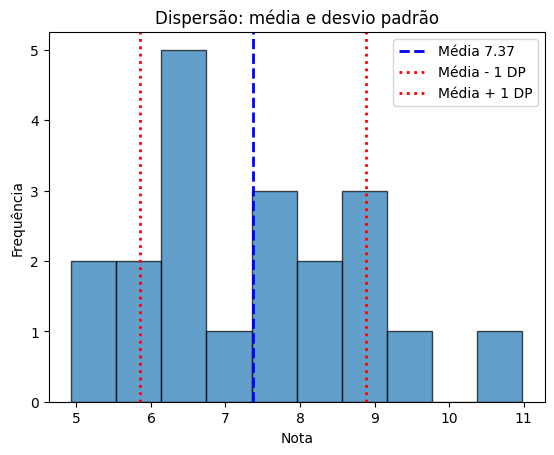

In [ ]:
import numpy as np

# Série usada: nota_prova
notas = df["nota_prova"].dropna()

# 1) Amplitude
amplitude = notas.max() - notas.min()

# 2) Variância
variancia = notas.var(ddof=1)  # ddof=1 para variância amostral

# 3) Desvio padrão
desvio_padrao = notas.std(ddof=1)  # coerente com a variância amostral

# 4) Coeficiente de variação
media = notas.mean()
cv = desvio_padrao / media * 100

print("=== Medidas de dispersão ===")
print(f"Amplitude:          {amplitude:.2f}")
print(f"Variância (amost.): {variancia:.2f}")
print(f"Desvio padrão:      {desvio_padrao:.2f}")
print(f"Coeficiente var.:   {cv:.2f}%")

# Visualização: histograma com faixa de média ± desvio padrão
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(notas, bins=10, edgecolor="black", alpha=0.7)

ax.axvline(media, color="blue", linestyle="--", linewidth=2, label=f"Média {media:.2f}")
ax.axvline(media - desvio_padrao, color="red", linestyle=":", linewidth=2, label=f"Média - 1 DP")
ax.axvline(media + desvio_padrao, color="red", linestyle=":", linewidth=2, label=f"Média + 1 DP")

ax.set_title("Dispersão: média e desvio padrão")
ax.set_xlabel("Nota")
ax.set_ylabel("Frequência")
ax.legend()
plt.show()


### Explicação do código linha a linha

1. `notas = df["nota_prova"].dropna()`  
   Seleciona a variável quantitativa contínua e remove valores ausentes.

2. `amplitude = notas.max() - notas.min()`  
   Calcula a diferença entre o valor máximo e o mínimo.

3. `variancia = notas.var(ddof=1)`  
   Calcula a variância amostral. O parâmetro `ddof=1` garante a fórmula com n-1 no denominador.

4. `desvio_padrao = notas.std(ddof=1)`  
   Calcula a raiz quadrada da variância, mantendo a mesma unidade das notas.

5. `media = notas.mean()`  
   Obtém a média aritmética para ser usada no coeficiente de variação.

6. `cv = desvio_padrao / media * 100`  
   Calcula o coeficiente de variação em porcentagem, relacionando dispersão e média.

7. Impressão formatada  
   Mostra amplitude, variância, desvio padrão e CV no console.

8. Construção do histograma  
   `ax.hist(notas, bins=10, ...)` cria o gráfico de frequências.

9. `ax.axvline(media, ...)`  
   Adiciona linha vertical na média como referência.

10. `ax.axvline(media - desvio_padrao, ...)` e `ax.axvline(media + desvio_padrao, ...)`  
    Adiciona linhas verticais para mostrar o intervalo de uma unidade de desvio padrão ao redor da média.

11. Títulos, rótulos e legenda  
    Documentam o gráfico e identificam cada linha traçada.

### Observações

• Amplitude mostra apenas a distância entre extremos, não a dispersão geral  
• Variância e desvio padrão refletem a variabilidade em torno da média  
• Aproximadamente 68% dos dados de uma distribuição normal ficam no intervalo média ± 1 desvio padrão  
• O coeficiente de variação permite comparar dispersão de variáveis em escalas distintas, por exemplo notas versus horas de estudo


## Correlação

### Conceitos

Correlação  
• Medida estatística que expressa a força e a direção da associação linear entre duas variáveis quantitativas  

Tipos de correlação  
• Positiva: quando uma variável aumenta, a outra tende a aumentar  
• Negativa: quando uma variável aumenta, a outra tende a diminuir  
• Nula: não existe relação linear entre as variáveis  

Coeficiente de Pearson  
• Varia de -1 a +1  
• Valores próximos a +1 indicam forte correlação positiva  
• Valores próximos a -1 indicam forte correlação negativa  
• Valores próximos a 0 indicam ausência de correlação linear  


=== Matriz de correlação (Pearson) ===
                      disciplinas_cursadas  nota_prova  semestre
disciplinas_cursadas                 1.000      -0.183    -0.027
nota_prova                          -0.183       1.000     0.322
semestre                            -0.027       0.322     1.000


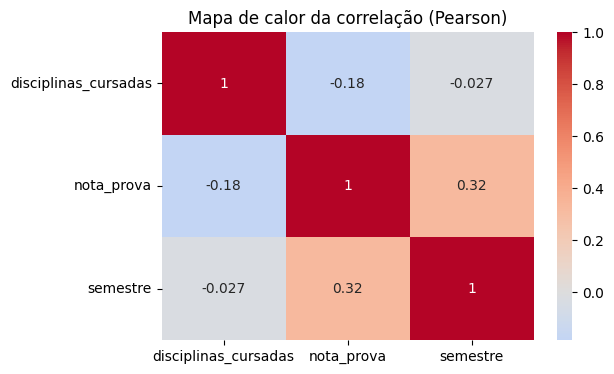

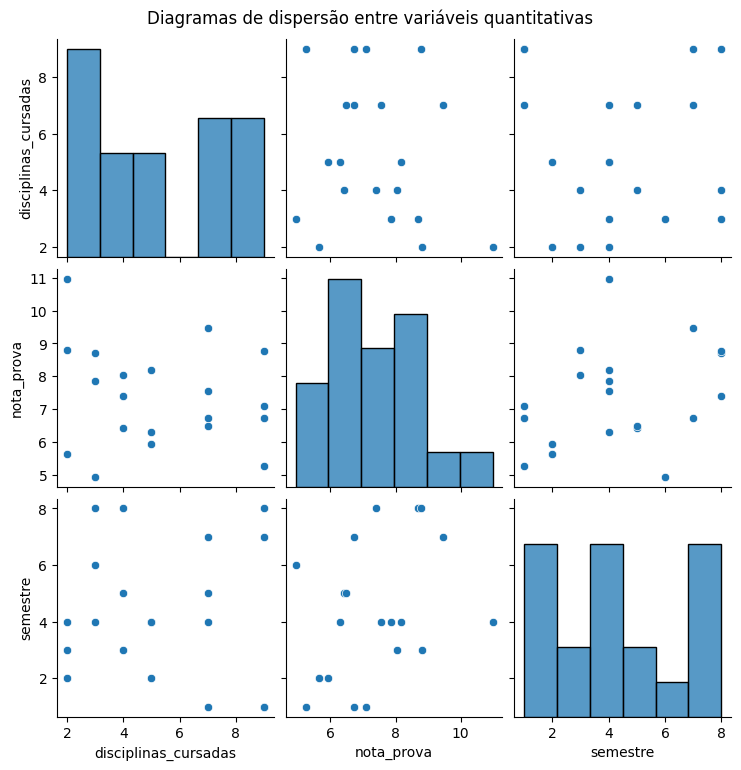

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleção de variáveis quantitativas do df
quantitativas = df[["disciplinas_cursadas", "nota_prova", "semestre"]]

# 1) Cálculo da matriz de correlação (Pearson)
corr_matrix = quantitativas.corr(method="pearson")
print("=== Matriz de correlação (Pearson) ===")
print(corr_matrix.round(3))

# 2) Visualização com mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de calor da correlação (Pearson)")
plt.show()

# 3) Gráfico de dispersão para pares de variáveis
sns.pairplot(quantitativas)
plt.suptitle("Diagramas de dispersão entre variáveis quantitativas", y=1.02)
plt.show()

### Explicação do código linha a linha

1. `quantitativas = df[["disciplinas_cursadas", "nota_prova", "semestre"]]`  
   Seleciona apenas colunas numéricas do DataFrame para análise de correlação.

2. `corr_matrix = quantitativas.corr(method="pearson")`  
   Calcula a matriz de correlação de Pearson, com valores entre -1 e +1.

3. Impressão com `round(3)`  
   Mostra os coeficientes arredondados a três casas decimais.

4. `sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)`  
   Cria um mapa de calor onde as cores representam a força e direção da correlação.  
   • Azul indica correlação negativa  
   • Vermelho indica correlação positiva  
   • Intensidade da cor mostra a magnitude

5. `sns.pairplot(quantitativas)`  
   Gera diagramas de dispersão para todos os pares de variáveis.  
   • Correlação positiva: nuvem de pontos inclinada para cima  
   • Correlação negativa: nuvem inclinada para baixo  
   • Correlação próxima de zero: pontos dispersos sem padrão definido

6. `plt.suptitle(...)`  
   Adiciona título geral ao conjunto de gráficos.

### Observações

• Identifique variáveis com correlação alta em magnitude (|r| > 0.7) e discuta implicações  
• Observe se existem relações claras nos diagramas de dispersão mesmo quando o coeficiente de Pearson é baixo (pode indicar relação não linear)  
• Lembre-se de que correlação não implica causalidade: duas variáveis podem estar correlacionadas por influência de um terceiro fator


## Distribuições de probabilidade e distribuição normal


### Conceitos gerais sobre distribuições

Distribuição de probabilidade  
• Descreve como os valores de uma variável aleatória se distribuem em termos de frequência ou probabilidade  
• Pode ser discreta (ex.: binomial, Poisson) ou contínua (ex.: uniforme, exponencial, normal)  
• Importante para modelar fenômenos e apoiar inferência estatística

Características de uma distribuição  
• Forma: simétrica ou assimétrica  
• Posição: média, mediana e moda  
• Dispersão: variância e desvio padrão  
• Caudas: presença de valores extremos e peso relativo das caudas

### Distribuição normal

Características  
• Curva em forma de sino, simétrica em torno da média  
• Média, mediana e moda coincidem  
• Aproximadamente 68% dos valores estão em média ± 1 desvio padrão, 95% em ± 2, 99,7% em ± 3  

Aplicações práticas em mineração de dados  
• Avaliação de hipóteses estatísticas  
• Modelagem de erros e ruídos em dados  
• Normalização e padronização de variáveis  
• Base para algoritmos que assumem normalidade

Importância da normalidade  
• Muitos testes estatísticos (t de Student, ANOVA) pressupõem normalidade dos dados  
• Modelos paramétricos funcionam melhor sob essa suposição  
• Avaliar a aderência dos dados à normalidade ajuda a escolher o método analítico adequado


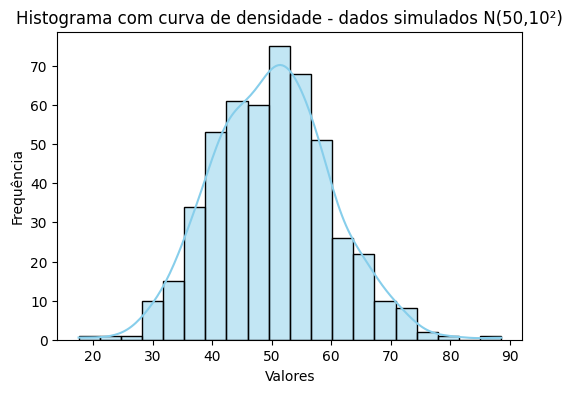

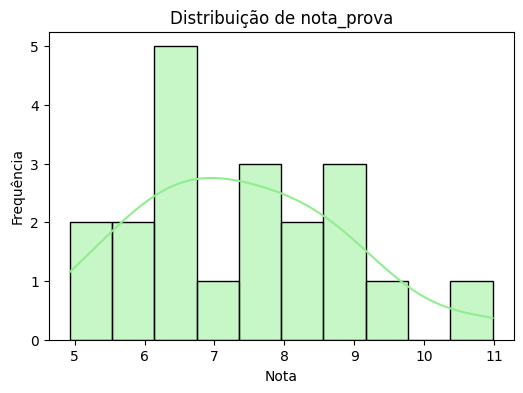

=== Teste de Shapiro-Wilk para normalidade em nota_prova ===
Estatística: 0.975, p-valor: 0.861
Não rejeitamos H0: os dados podem ser considerados normais.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1) Simulação de uma variável normal
np.random.seed(42)
dados_normais = np.random.normal(loc=50, scale=10, size=500)

# 2) Histograma e curva de densidade
plt.figure(figsize=(6,4))
sns.histplot(dados_normais, bins=20, kde=True, color="skyblue", edgecolor="black")
plt.title("Histograma com curva de densidade - dados simulados N(50,10²)")
plt.xlabel("Valores")
plt.ylabel("Frequência")
plt.show()

# 3) Comparação com dados reais do df (nota_prova)
plt.figure(figsize=(6,4))
sns.histplot(df["nota_prova"], bins=10, kde=True, color="lightgreen", edgecolor="black")
plt.title("Distribuição de nota_prova")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

# 4) Teste de normalidade Shapiro-Wilk
stat, pvalue = stats.shapiro(df["nota_prova"].dropna())
print("=== Teste de Shapiro-Wilk para normalidade em nota_prova ===")
print(f"Estatística: {stat:.3f}, p-valor: {pvalue:.3f}")

if pvalue > 0.05:
    print("Não rejeitamos H0: os dados podem ser considerados normais.")
else:
    print("Rejeitamos H0: os dados não seguem distribuição normal.")


### Explicação do código linha a linha

1. `dados_normais = np.random.normal(loc=50, scale=10, size=500)`  
   Gera 500 observações de uma distribuição normal com média 50 e desvio padrão 10.

2. `sns.histplot(dados_normais, bins=20, kde=True, ...)`  
   Constrói histograma dos dados simulados e adiciona a curva de densidade (`kde=True`) para visualizar a forma da distribuição.

3. Gráfico da variável `nota_prova` do DataFrame  
   Permite comparar os dados reais com uma distribuição normal idealizada.

4. `stats.shapiro(df["nota_prova"].dropna())`  
   Executa o teste de Shapiro-Wilk para verificar a hipótese de normalidade.  
   • Hipótese nula (H0): os dados seguem distribuição normal  
   • Se p-valor > 0,05, não rejeitamos H0 (dados plausivelmente normais)  
   • Se p-valor ≤ 0,05, rejeitamos H0 (dados não normais)

5. Impressão condicional do resultado  
   Mostra de forma interpretável se os dados podem ou não ser considerados normais.

### Observações

• Observe se os dados simulados formam a curva em sino esperada da normal  
• Compare a forma da distribuição de `nota_prova` com a curva normal  
• Interprete o p-valor do teste de Shapiro-Wilk como evidência sobre a normalidade  
• Entenda que pequenas amostras podem não rejeitar a normalidade mesmo em distribuições assimétricas, e amostras muito grandes podem rejeitar por pequenas diferenças
